## Running model on fabricated data to visualize relationships
Testing the concept by generating data logically. Theta-phase cycles from 0 to 360. Spatial position is linear from 0 to 3600. Arbitrarily chosen values with added noise to test running the model.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

   theta_phase_LFP   position  spike_times
0        31.720336 -12.979568     5.061584
1       -23.756310 -65.129293     5.522117
2        44.660667   7.768557     6.952131
3       -36.041756  16.447387     9.197052
4         0.964298 -94.732912    14.393489


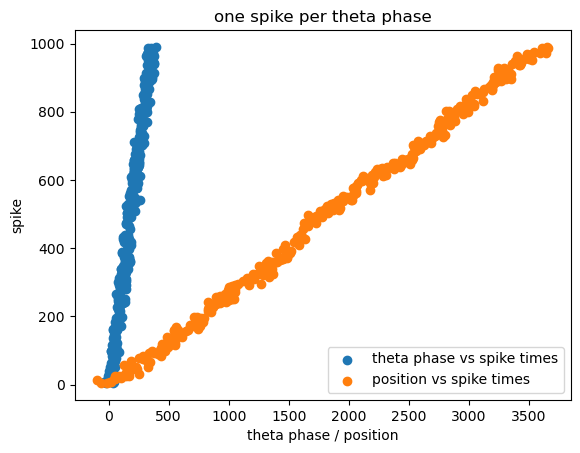

In [11]:
# generate synthetic data as simple test case
# one spike per theta phase

theta_phase = np.linspace(0, 360, 360).astype(int)
position = np.linspace(0, 3600, len(theta_phase))

np.random.seed(42) # generate random spike timestamps
spike_times = np.sort(np.random.uniform(low = 0, high = 1000, size = len(theta_phase)))

noise_theta = np.random.normal(scale=20, size=len(theta_phase)) # small gaussian noise
noise_pos = np.random.normal(scale=50, size=len(theta_phase))

theta_phase = theta_phase + noise_theta
position = position + noise_pos

df = pd.DataFrame({'theta_phase_LFP': theta_phase, 'position': position, 'spike_times': spike_times})
print(df.head())

plt.scatter(theta_phase, spike_times, label = "theta phase vs spike times")
plt.scatter(position, spike_times, label = "position vs spike times")
plt.xlabel("theta phase / position")
plt.ylabel("spike")
plt.title("one spike per theta phase")
plt.legend()
plt.show()

   theta_phase_LFP   position  spike_times
0        19.686448  -8.407191     4.632023
1        -4.279777 -23.604529     5.061584
2        -0.989274 -98.964991     5.522117
3        14.496390  47.423368     6.952131
4       -21.454440 -43.609296     9.197052


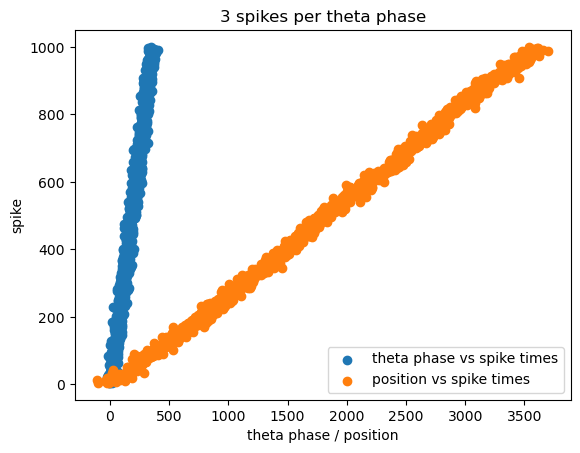

In [12]:
# 3 spikes per theta phase

num_spikes = 3
np.random.seed(42)

theta_phase = np.linspace(0, 360, 360).astype(int)
position = np.linspace(0, 3600, len(theta_phase))

theta_phase = np.repeat(theta_phase, num_spikes)
position = np.repeat(position, num_spikes)

spike_times = np.sort(np.random.uniform(low = 0, high = 1000, size = len(theta_phase)))

noise_theta = np.random.normal(scale=20, size=len(theta_phase)) # small gaussian noise
noise_pos = np.random.normal(scale=50, size=len(theta_phase))

theta_phase = theta_phase + noise_theta
position = position + noise_pos

df = pd.DataFrame({'theta_phase_LFP': theta_phase, 'position': position, 'spike_times': spike_times})
print(df.head())

plt.scatter(theta_phase, spike_times, label = "theta phase vs spike times")
plt.scatter(position, spike_times, label = "position vs spike times")
plt.xlabel("theta phase / position")
plt.ylabel("spike")
plt.title("3 spikes per theta phase")
plt.legend()
plt.show()

MSE: 232.46589509028988
RMSE: 15.246832296916297
R² Score: 0.9974203705766435


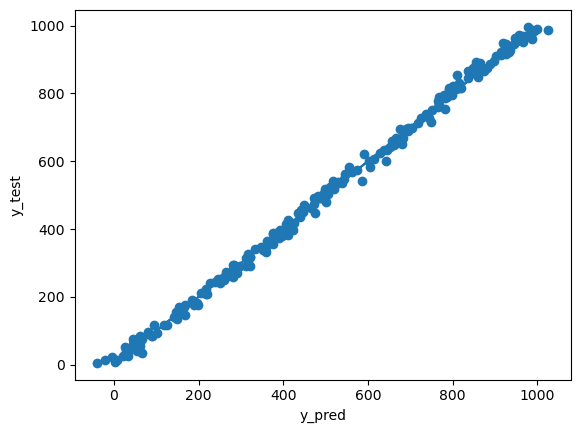

In [14]:
# train a simple regression model

X = df[['theta_phase_LFP', 'position']]
y = df['spike_times']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# test error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
# 

plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

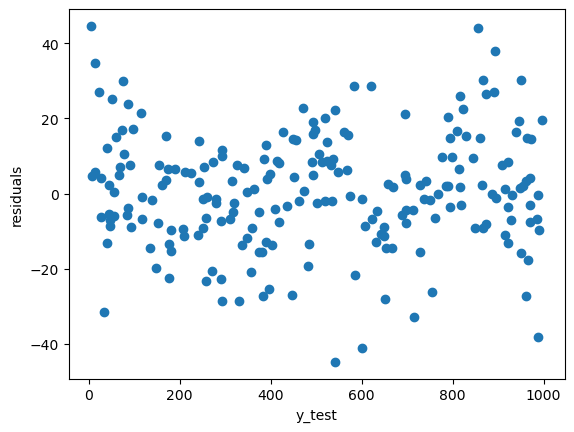

In [19]:
# residuals plot

residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.xlabel("y_test")
plt.ylabel("residuals")
plt.show()

In [21]:
# loading in real data

spikes_df = pd.read_csv("/Users/hannahghaffari/Documents/Mehta_lab/ecephys_cache_dir/session_746083955/spike_times.csv")
running_df = pd.read_csv("/Users/hannahghaffari/Documents/Mehta_lab/ecephys_cache_dir/session_746083955/running_speed_data.csv")

      unit_id  spike_time
24  951881498   34.401338
25  951881498   34.838539
26  951881498   37.834808
27  951881498   50.796454
28  951881498   50.934287


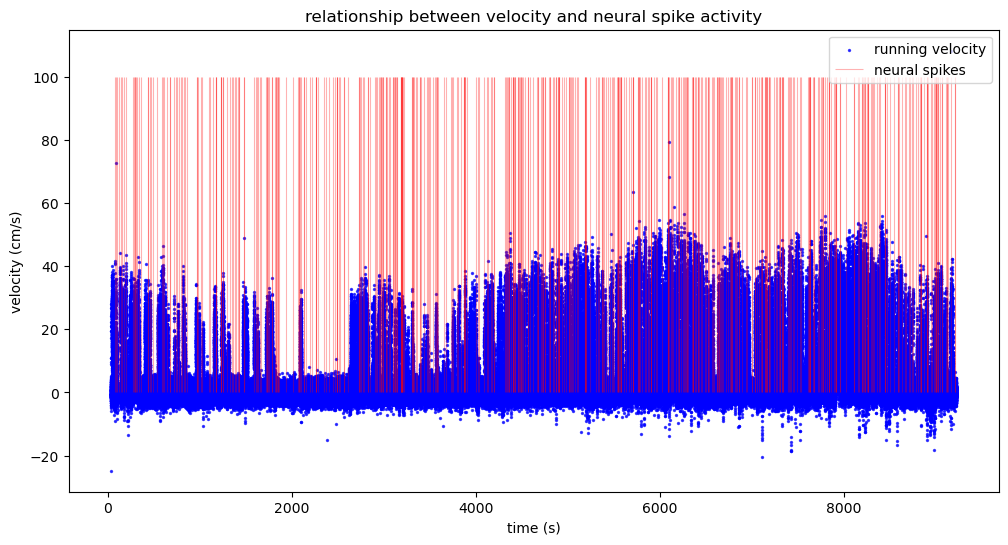

In [22]:
# visualize data relationships

filter = (spikes_df['spike_time'] > 34) & (spikes_df['spike_time'] < 9223)
spikes_filt = spikes_df[filter]

spikes_filt.to_csv("spikes_filt.csv") # 50748599 spikes_filt.csv

print(spikes_filt.head(5))

sampled_spikes = spikes_filt.sample(frac = 0.00001, random_state = 30) # plot subset of spikes to visualize

plt.figure(figsize=(12,6))

plt.scatter(running_df['start_time'], running_df['velocity'], s=2, alpha=0.7, color = "blue", label = "running velocity")
plt.vlines(sampled_spikes['spike_time'], ymin=0, ymax=100, color='red', alpha=0.3, linewidth = 0.8, label = "neural spikes")

plt.xlabel("time (s)")
plt.ylabel("velocity (cm/s)")
plt.title("relationship between velocity and neural spike activity")
plt.legend(loc='upper right')

In [25]:
# spike occurances are recorded as timestamps
print(spikes_df)

            unit_id   spike_time
0         951881498     4.363977
1         951881498     6.271812
2         951881498     6.750046
3         951881498     8.497914
4         951881498     8.990615
...             ...          ...
53634979  951872973  9676.238428
53634980  951872973  9676.557595
53634981  951872973  9676.564028
53634982  951872973  9677.337293
53634983  951872973  9678.552458

[53634984 rows x 2 columns]
